<a href="https://colab.research.google.com/github/shelvasha/Notebooks/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What's regression?
* In stats modeling, regressions (analysis) is estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')
  * How much or how many" of something.
  * Predicting something from prior data (think slope.

#### What's going to be covered in this notebook:

* Architecture of a neural network regression model.
* Input and output shapes of a regression model (features and labels).
* Creating sutom data to view and fit.
* Steps in modelling:
    1. Create a model
    2. Compile a model
    3. Fit a model
    4. Evaluate a model
* Different evaluation methods
* Saving and loading models






### Architecture of regression inputs, outputs and shapes

* Having understanding or intuition of the data, its input and shape and the effect that this has on the output and its shape, is probably the most important part of machine learning.
*   A large portion of time focuses on the inputs, specifically the encoding of inputs.

#### Anatomy of a Neural network in Tensorflow
* Anatomically, neural networks consists of:
1. Input layer
2. Hidden layer
3. Output layer
4. Output layer shape

And bonus parameters (more on those)
4. Neurons per hidden layer
5. Hidden activation
6. Output activation
7. Loss function
8. Optimizer



## Introduction to Regression with Neural Networks in TensorFlow

There are many definititons for a regression problem, but in our case we are going to simplify it: predicting a numerical value based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


### Creating data to view and fit

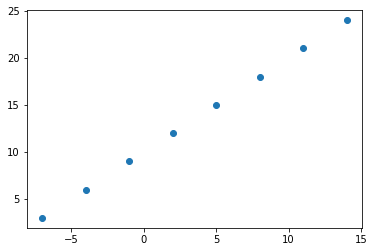

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

# Create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize
plt.scatter(X,y)


In [6]:
# Turn our NumPy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X.shape,y.shape

(TensorShape([8]), TensorShape([8]))

# Steps in modeling with TensorFlow
1. **Creating a model** - define the input and output layers.
2. **Compiling a model** - define the loss function
3. Fitting a model - letting the model try to find patterns between X & y (features and labels) 



In [108]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
# A Sequential model is appropriate for a plain stack of
# layers where each layer has exactly one input tensor and one output tensor.

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error. 
              optimizer=tf.keras.optimizers.SGD(), #short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 6ms/step - loss: 20.6214 - mae: 20.6214
Epoch 2/5
2/2 [==============================] - 0s 4ms/step - loss: 10.5004 - mae: 10.5004
Epoch 3/5
2/2 [==============================] - 0s 2ms/step - loss: 14.5408 - mae: 14.5408
Epoch 4/5
2/2 [==============================] - 0s 3ms/step - loss: 10.1988 - mae: 10.1988
Epoch 5/5
2/2 [==============================] - 0s 2ms/step - loss: 14.8556 - mae: 14.8556


In [109]:
# Check out X and y
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [110]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[13.3044195]], dtype=float32)

### Model Improvement

- We have a model and we've fit data to it and made a prediction.... but it isn't great.
- How do we improve the model?
  - We can improve the model by tweaking the steps we took to create the model in the first place.
  - In this case, that would be:
    1. Increasing the number of hidden units (neurons) within each hidden layer.
    2. Changing the optimization function or perhaps the learning rate.
    3. Fit the model using more epochs, so give the model more data or chances to fit the model to the data better. 

In [111]:
# Let's rebuild the model

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
# A Sequential model is appropriate for a plain stack of
# layers where each layer has exactly one input tensor and one output tensor.

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile model
model.compile(loss="mae", optimizer="sgd", metrics=["mae"])

# Fit the model (this time we'll train for longer)
model.fit(X,y, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 20.6214 - mae: 20.6214
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 10.5004 - mae: 10.5004
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 14.5408 - mae: 14.5408
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1988 - mae: 10.1988
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.8556 - mae: 14.8556
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0283 - mae: 12.0283
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2358 - mae: 9.2358
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 13.6569 - mae: 13.6569
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 13.9578 - mae: 13.9578
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9240 - mae: 9.9240
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [112]:
# Let's remind ourselves of the data again
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [113]:
# Let's see if the model has improved
model.predict([17.0])

array([[16.654217]], dtype=float32)

In [114]:
# We can do better than that. Let's increase the number of neurons and see where we are end up

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
# A Sequential model is appropriate for a plain stack of
# layers where each layer has exactly one input tensor and one output tensor.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss="mae", optimizer="sgd", metrics=["mae"])

# Fit the model again
model.fit(X,y, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.8156 - mae: 42.8156
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 5.7016 - mae: 5.7016
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.7998 - mae: 14.7998
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 14.5882 - mae: 14.5882
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7802 - mae: 10.7802
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 17.3618 - mae: 17.3618
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9411 - mae: 9.9411
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 15.6830 - mae: 15.6830
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 23.9220 - mae: 23.9220
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7834 - mae: 10.7834
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [115]:
# Try predicting again
model.predict([17.0])

array([[13.61597]], dtype=float32)

#### In practice, not all changes improve the model
- In case 2, the model was better than the original after changing the the number of epochs taken to train the model.
- In case 3, the model performed worse by increasing the neuron (Dense) layers.
- How about the optimizer?

In [116]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
# A Sequential model is appropriate for a plain stack of
# layers where each layer has exactly one input tensor and one output tensor.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# Compile model
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["mae"])

# Fit the model again
model.fit(X,y, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 46.8201 - mae: 46.8201
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 32.1082 - mae: 32.1082
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 22.2902 - mae: 22.2902
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9259 - mae: 9.9259
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3159 - mae: 7.3159
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9177 - mae: 11.9177
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6374 - mae: 11.6374
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4021 - mae: 8.4021
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 4.6909 - mae: 4.6909
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 6.7081 - mae: 6.7081
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - los

### Takeaways
- Optimizer changes and altering the learning rate had the ***most profound*** effect on the model improvement.

### Evaluating a model

- In practice, the typical workflow of building a model:
  1. Create a model
  2. Fit it
  3. Evaluate it
  4. Tweak the model
  5. Repeat steps 2-4.

#### When it comes to evaluation, **visualize, visualize, visualize**.
- It's good to visualize the data - what kind of data are we looking at?
- The model itself - what does the model look like?
- The training of the model - how does the model perform while it learns?
- Predictions of the model - how well do the predictions line up with truth?

In [117]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [118]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

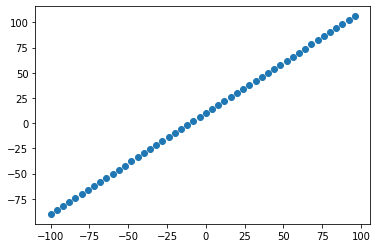

In [119]:
# Visualize

import matplotlib.pyplot as plt
plt.scatter(X,y)

### The Three Sets
- **Training set** - Course materials
- **Validation set** - Practice test
- **Test set** - The test

The whole point of this is generalization so that the model can perform well on data it hasn't seen before.

In [120]:
# Check length of how many samples we have
len(X)

50

In [121]:
# Split the data into training and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data again
- Now that we've got our data split into training and test sets, let's visualize again

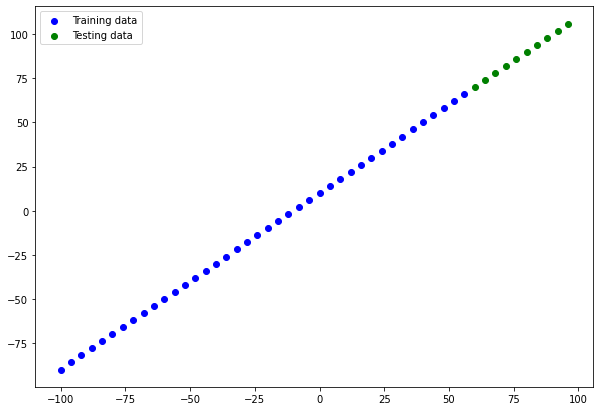

In [122]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c="b", label="Training data") # Our model is learning on this data 
plt.scatter(X_test,y_test, c="g", label="Testing data")
plt.legend();

In [148]:
# Build a neural network with the training data
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                  tf.keras.layers.Dense(1, name="output_layer")], name="Example_Model")

# The new parameter (input_shape) passes a default shape (tensor) of the data
# in order to summarize the model prior to fitting.

model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["mae"])
model.fit(X_train, y_train, epochs=100, verbose=0)
#model.summary()

- Total parameters - total number of parameters in the model.
- Trainable parameters - the parameters in the model that can update as it trains.
- Non-trainable parameters - these are parameters that aren't updated during training (typical in already learned patterns or parameters e.g. **transfer learning**)

In [149]:
# Plotting the model
#from tensorflow.keras.utils import plot_model
#plot_model(model=model, show_shapes=True)

### Visualizing a model's predictions

In [150]:
# Make Predictions
y_pred = model.predict(X_test)

# Plot the predictions - Let's do a function to save time in the future
def plot_pred (train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b", label="Training data")
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  plt.scatter(test_data,predictions, c="r", label="Predictions")
  plt.legend();

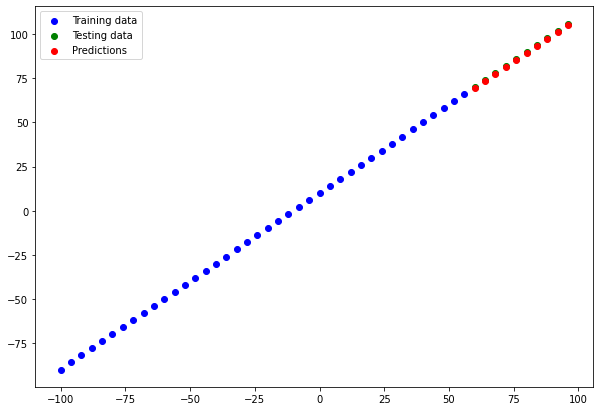

In [151]:
plot_pred() # Not great initially but much better when increasing the learning rate.

### Evaluating model predictions with regression evaluation metrics

- Mean Absolute Error
- Mean square Error
- Huber

In [152]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 89ms/step - loss: 0.7175 - mae: 0.7175


[0.7175437808036804, 0.7175437808036804]

In [153]:
# MAE
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7175423>

In [154]:
# MSE
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5252059>